In [1]:
from time import sleep
import numpy as np
from pid import PID
from video import Video
from bluerov_interface import BlueROV
from pymavlink import mavutil
import cv2

# TODO: import your processing functions
from pid_from_frame import *

print("Main started!")


Main started!


x_list = [395, 423], y_list = [52, 168]

x_list = [348, 355], y_list = [169, 62]

center_lines = [<Line.Line object at 0x7f53279e50>], center_line = <Line.Line object at 0x7f53279e50>
longitudinal = 0.0, lateral = 2.4707561321376765, yaw = -2.6402212058322228


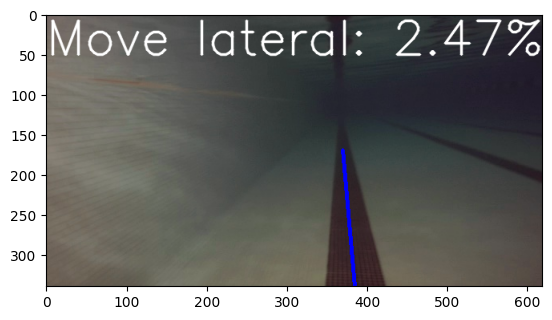

In [2]:
frame = cv2.imread("frames/frame3.jpg")
plt.imshow(frame)
# Create the PID object
PIDLateral = PID(50, 0, -6, 100)
PIDLongitudinal = PID(50, 0, 0, 100)
PIDYaw = PID(30, 0, 0, 100)
# where to write frames to. If empty string, no photos are written!
output_path = "./frames/frame"  # {n}.jpg

window_frame_count = 11  # the number of center lines to store for calculating median
max_misses = 6 # the number of frames without receiving a center line before the robot starts to spin

longitudinal_power = 0
lateral_power = 0
yaw_power = 0

count = 0
center_lines = []
center_line = line_from_frame(frame[20 : -1, 20 : -1], x_intercept_tolerance=25, lanes_x_tolerance = 300, lanes_y_tolerance = 100, lanes_darkness_threshold=10)
longitudinal, lateral, yaw = pid_from_line(center_line, PIDLateral, PIDLongitudinal, PIDYaw, frame.shape[1])
print(f"{longitudinal = }, {lateral = }, {yaw = }")
plt.imshow(draw_frame(frame[20 : -1, 20 : -1], center_line, longitudinal, lateral, yaw))
# cv2.imwrite(f"{output_path}rendered.jpg", draw_frame(frame, center_line, longitudinal, lateral, yaw))                

In [3]:
# cv2.imwrite("camera_stream.jpg", frame)
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# center_lines.append(center_line)
# if len(center_lines) > window_frame_count:
    # center_lines.pop(0)

# if center_lines.count(None) > 5:
#     print("No lines found in last 5 images. ")
#     yaw_power = 25  # %
#     lateral_power = 0
#     longitudinal_power = 0
# else:
#     good_lines = list(filter(lambda line: line is not None, center_lines))
#     if len(good_lines) > 1:
#         good_lines.sort(key=lambda x: x.slope)
#         middle_line = good_lines[-1]
#         longitudinal_power, lateral_power, yaw_power = pid_from_line(middle_line, PIDLateral, PIDLongitudinal, PIDYaw, frame.shape[1])
#         if output_path != "":
#             print("writing file")
#             cv2.imwrite(f"{output_path}rendered.jpg", draw_frame(frame, middle_line, longitudinal_power, lateral_power, yaw_power))
#     print(f"{yaw_power = }")
#     print(f"{longitudinal_power = }")
#     print(f"{lateral_power = }")

# print(frame.shape)

In [4]:
# import video_maker
# frame = cv2.imread("frames/output_stream.jpg")
# frame = video_maker.render_frame(frame)
# plt.imshow(frame)